# Gaussian processes with non-Normal likelihoods

[Data set download](https://s3.amazonaws.com/bebi103.caltech.edu/data/wolfenden_arrhenius.csv)

<hr>

In [1]:
# Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade colorcet bebi103 arviz cmdstanpy watermark"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    import cmdstanpy; cmdstanpy.install_cmdstan()
    data_path = "https://s3.amazonaws.com/bebi103.caltech.edu/data/"
else:
    data_path = "../data/"
# ------------------------------

/Users/bois/opt/anaconda3/lib/python3.9/site-packages/colorcet/__init__.py:74: UserWarning: Trying to register the cmap 'cet_gray' which already exists.
  register_cmap("cet_"+name, cmap=cm[name])
/Users/bois/opt/anaconda3/lib/python3.9/site-packages/colorcet/__init__.py:74: UserWarning: Trying to register the cmap 'cet_gray_r' which already exists.
  register_cmap("cet_"+name, cmap=cm[name])


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
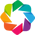

Loading BokehJS ...

In [2]:
import numpy as np
import pandas as pd

import cmdstanpy
import arviz as az

import iqplot
import bebi103

import bokeh.io
bokeh.io.output_notebook()

Thus far in our studies of Gaussian processes, we have considered models with Normal likelihoods which enables marginalization over the latent variables, the values of the nonparametric function we are fitting. We could then compute the function values (the latent variables) after optimization or sampling of the hyperparameters by drawing samples out of the posterior, for which we have an analytical expression. 

In this lesson, we will explicitly sample the latent variables. We will first do it for a model with a Normal likelihood to as a demonstration. We will then do it for a non-Normal likelihood, where is it necessary.

## Generating samples of latent variables using MCMC

We will again consider the Wolfenden, et al., chemical kinetics data set. We'll start be loading the data set, centering and scaling, and getting up the points for which we want to evaluate the nonparametric function.

In [3]:
# Load data
df = pd.read_csv(os.path.join(data_path, "wolfenden_arrhenius.csv"))
df["T (K)"] = 1000 / df["1000/T (1/K)"]
df["k (1/s)"] = np.exp(df["ln k (1/s)"])
T = df["T (K)"].values
k = df["k (1/s)"].values

Just as a reminder, let's make a quick plot of the data.

In [4]:
# Make plot
p = bokeh.plotting.figure(
    frame_height=250, frame_width=350, x_axis_label="T (K)", y_axis_label="k (1/s)"
)
p.circle(source=df, x="T (K)", y="k (1/s)")

bokeh.io.show(p)

### A GP generative model

The unmarginalized generative model we have been using is

\begin{align}
&\alpha \sim \text{HalfNorm}(2)\\[1em]
&\rho \sim \text{InvGamma}(0.5, 2)\\[1em]
&\sigma \sim \text{HalfNorm}(0.1)\\[1em]
&f \mid \mathbf{T}, \alpha, \rho \sim \text{GP}(\mathbf{0}, k_\mathrm{SE}(\mathbf{T}, \mathbf{T}' ; \alpha, \rho)),\\[1em]
&y_i \mid \mathbf{T}, f, \sigma \sim \text{Norm}(f(T_i), \sigma)\;\forall i.
\end{align}

We can equivalently write this as

\begin{align}
&\alpha \sim \text{HalfNorm}(2)\\[1em]
&\rho \sim \text{InvGamma}(0.5, 2)\\[1em]
&\sigma \sim \text{HalfNorm}(0.1)\\[1em]
&\mathbf{f} \mid \mathbf{T}, \alpha, \rho \sim \text{MultiNorm}(\mathbf{T}, \mathsf{K}),\\[1em]
&y_i \mid f_i, \sigma \sim \text{Norm}(f_i, \sigma)\;\forall i,
\end{align}

where $\mathsf{K}$ is the covariance matrix constructed from the squared exponential kernel with hyperparameters $\rho$ and $\alpha$. Importantly, we are going to **sample** the values of $f$ at temperature $T_i$.

### Noncentering

This model has a hierarchical structure, with a layer of latent variables $\mathbf{f}$ between the hyperparamaters $\alpha$ and $\rho$ and the observed data $\mathbf{y}$. As such, it is useful for sampling to noncenter the model. We have not yet noncentered a multivariate conditional prior. Say we have a multivariate Normal conditional prior for parameters $\boldsymbol{\theta}$ conditioned on hyperparameters $\boldsymbol{\phi}$ and $\mathsf{\Sigma}$,

\begin{align}
\boldsymbol{\theta} \sim \text{MultiNorm}(\boldsymbol{\phi}, \mathsf{\Sigma}).
\end{align}

If $\mathsf{L}$ is the Cholesky decomposition of $\mathsf{\Sigma}$, then this is can be equivalently written in noncentered form as

\begin{align}
&\tilde{\theta}_i \sim \text{Norm}(0, 1)\;\forall i,\\[1em]
&\boldsymbol{\theta} = \boldsymbol{\phi} + \mathsf{L}\cdot \tilde{\boldsymbol{\theta}}
\end{align}

Therefore, we can write the generative model in noncentered form,

\begin{align}
&\alpha \sim \text{HalfNorm}(2)\\[1em]
&\rho \sim \text{InvGamma}(0.5, 2)\\[1em]
&\sigma \sim \text{HalfNorm}(0.1)\\[1em]
&\tilde{f}_i \sim \text{Norm}(0, 1)\;\forall i,\\[1em]
&\mathbf{f} = \mathsf{L}\cdot\mathbf{f},\\[1em]
&y_i \mid f_i, \sigma \sim \text{Norm}(f_i, \sigma)\;\forall i,
\end{align}

where we have used the fact that because of the preprocessing of the data set, the mean of the GP is zero. Here, $\mathsf{L}$ is the Cholesky decomposition of $\mathsf{K}$.

## Sampling latent variables with Stan

Now that we have our model, we can code it up in Stan and draw samples.

```stan
data {
  int<lower=1> N;
  vector[N] y;

  int<lower=1> Nstar;
  array[N] int xstar_inds;
  array[Nstar] real xstar;
}


transformed data {
  real delta = 1e-8;
}


parameters {
  real<lower=0> alpha;
  real<lower=0> rho;

  real<lower=0> sigma;

  vector[Nstar] f_tilde;
}


transformed parameters {
  vector[Nstar] f;

  {
    matrix[Nstar, Nstar] K = cov_exp_quad(xstar, alpha, rho)
                             + diag_matrix(rep_vector(delta, Nstar));
    matrix[Nstar, Nstar] L = cholesky_decompose(K);
    f = L * f_tilde;
  }
}


model {
  alpha ~ normal(0.0, 2.0);
  rho ~ inv_gamma(0.5, 2.0);

  sigma ~ normal(0.0, 1.0);

  f_tilde ~ normal(0.0, 1.0);

  y ~ normal(f[xstar_inds], sigma);
}


generated quantities {
  array[N] real y_ppc;
  y_ppc = normal_rng(f, sigma);
}
```

There a few things to note in this Stan code. 

1. This is a generic Stan code for sampling univariate values of $x$ and $y$. For the problem of the kinetics data, $x = T$ and $y = k$.
2. The array `f` has the function value at all points we want to sample, `xstar`. Note that `xstar` *must* also contain the $x$-values of the points where data were actually measured. The `xstar_inds` array is the same length as the measured data `y`, and it contains the indices of the corresponding values in `xstar` where the `y` values were measured.
3. We need to add a small value to the diagonal of the covariance matrix to ensure positive definiteness.

Prior to sampling, we need to generate the arrays `xstar` and `xstar_inds` so that they contain the $x$-values for measured data. We also need to ensure that `xstar` has no repeats. This can be accomplished with the `bebi103.gp.append_sort_index()` function. It takes as input the values for which you want samples of the latent variables, $\mathbf{x}_*$, the $x$-values from the data set, $\mathbf{x}$, and an `index_origin` kwarg that indicates whether to start indexing at zero (for Python) or one (for Stan). It then generates a set of $x$-values for which to get samples of $f$ by appending $\mathbf{x}$ to $\mathbf{x}_*$ and deleting duplicates. It also generates the array of indicies linking the values of `xstar` to the measured quantities `y`.

In [5]:
# Center and scale
k_scaled = (k - k.mean()) / k.std()
T_scaled = (T - T.mean()) / T.std()

# Sample at 50 points
Nstar = 50

# Set up xstar
T_range = T_scaled.max() - T_scaled.min()
xstar = np.linspace(
    T_scaled.min() - 0.05 * T_range, T_scaled.max() + 0.05 * T_range, Nstar
)

# Generate the arrays for use in Stan
xstar, xstar_inds = bebi103.gp.append_sort_index(xstar, T_scaled, index_origin=1)

Let's take a look at the results.

In [6]:
xstar, xstar_inds, T

(array([-1.73988004, -1.67222743, -1.60457482, -1.58919923, -1.53692222,
        -1.46926961, -1.401617  , -1.3339644 , -1.26631179, -1.22693001,
        -1.19865918, -1.13100658, -1.06335397, -0.99570136, -0.96124699,
        -0.92804876, -0.86039615, -0.79274354, -0.72509093, -0.65743833,
        -0.58978572, -0.52324311, -0.52213311, -0.45448051, -0.3868279 ,
        -0.31917529, -0.25152269, -0.18459205, -0.18387008, -0.11621747,
        -0.04856487,  0.01908774,  0.08674035,  0.15439295,  0.22204556,
         0.28969817,  0.35735077,  0.42500338,  0.49265599,  0.50367757,
         0.56030859,  0.6279612 ,  0.69561381,  0.76326641,  0.81156517,
         0.83091902,  0.89857163,  0.96622423,  1.03387684,  1.10152945,
         1.16918205,  1.23683466,  1.2418742 ,  1.30448727,  1.37213987,
         1.42441689,  1.43979248,  1.50744509,  1.57509769]),
 array([56, 53, 45, 40, 40, 28, 22, 15, 10,  4]),
 array([526.97268063, 522.8398459 , 513.09748852, 506.12679808,
        506.12679808,

We see that we have a repeat measurement around $T = 506$ K. The `xstar_inds` array has a double entry for index `40`, which corresponds to the entry in `xstar` for that data point.

It is important to note that I chose $N_* = 50$. I chose this instead of a larger number because the speed of the sampling scales like $N_*^3$, since we need to perform a Cholesky decomposition of an $N_*\times N_*$ matrix for every leapfrog *step* in the sampling (not just for every sample as we do in the `generated quantities` block when we sample with the latent variables marginalized out). This can lead to very long sampling times if we allow $N_*$ to be too large.

We now have everything in place to set up sampling!

In [7]:
data = dict(
    N=len(T_scaled),
    y=k_scaled,
    Nstar=len(xstar),
    xstar_inds=xstar_inds,
    xstar=xstar
)

with bebi103.stan.disable_logging():
    sm = cmdstanpy.CmdStanModel(stan_file="gp_kinetics_no_marg.stan")
    samples = sm.sample(data=data)

samples = az.from_cmdstanpy(samples, posterior_predictive="y_ppc")

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

As usual, we should check diagnostics.

In [8]:
bebi103.stan.check_all_diagnostics(samples)

Effective sample size looks reasonable for all parameters.

Rhat looks reasonable for all parameters.

37 of 4000 (0.925%) iterations ended with a divergence.
  Try running with larger adapt_delta to remove divergences.

0 of 4000 (0.0%) iterations saturated the maximum tree depth of 10.

E-BFMI indicated no pathological behavior.


4

It's not too bad, but we do see a lot of divergences. This is not surprising given the hierarchical model. We have already noncentered, so we can try dialing up `adapt_delta`.

In [9]:
with bebi103.stan.disable_logging():
    samples = sm.sample(data=data, adapt_delta=0.95)

samples = az.from_cmdstanpy(samples, posterior_predictive="y_ppc")
    
bebi103.stan.check_all_diagnostics(samples)

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

                                                                                                                                                                                                                                                                                                                                
Effective sample size looks reasonable for all parameters.

Rhat looks reasonable for all parameters.

14 of 4000 (0.35%) iterations ended with a divergence.
  Try running with larger adapt_delta to remove divergences.

0 of 4000 (0.0%) iterations saturated the maximum tree depth of 10.

E-BFMI indicated no pathological behavior.


4

Much better! Let's take a look at the corner plot of the hyperparameters and $\sigma$ samples.

In [10]:
bokeh.io.show(bebi103.viz.corner(samples, parameters=["alpha", "rho", "sigma"]))

If we compare this corner plot to the one we acquired by sampling the posterior with the latent variables marginalized out (see [this portion of the lesson](mcmc_with_gps.ipynb)), they are the same, as we would expect.

We can also plot the samples of $\mathbf{f}_*$ as before.

In [11]:
fstar_scaled = (
    samples.posterior["f"]
    .stack({"sample": ("chain", "draw")})
    .transpose("sample", "f_dim_0")
)

# Uncenter and unscale
fstar = k.std() * fstar_scaled + k.mean()
Tstar = T.std() * xstar + T.mean()

bokeh.io.show(
    bebi103.viz.predictive_regression(
        fstar,
        Tstar,
        data=np.stack((T, k)).transpose(),
        color="orange",
        data_kwargs=dict(line_color="#1f78b4", fill_color="#1f78b4"),
    )
)

## Sampling with a Poisson likelihood

In the previous example, we decided to do things the hard way by sampling out of a hierarchical posterior when we could have marginalized out the latent variables because of the convenient properties of a Normal likelihood. Now, we consider a contrived scenario where we really do need to sample the latent variables. While contrived, it could conceivably be encountered in a real analysis.

Image we measure the copy number of a given mRNA transcript using, say single-molecule FISH, over the some time course. For each time point, we get transcript counts in 50 or so cells. We model the transcript counts as Poisson distributed (as we would for simple non-bursty gene expression). We suspect that the parameter $\lambda$ of the Poisson distribution varies in time, and we want to get a plot of how we think it may vary. We therefore model $\lambda$, or more specifically $\ln \lambda$ as varying according to a GP. Our generative model is

\begin{align}
\ln \lambda(t) \sim \text{GP}(m, k_\mathrm{SE}(t, t')),\\[1em]
n_i(t) \sim \text{Poisson}(\lambda(t)) \;\forall i.
\end{align}

Note that because we are using count data, we cannot center and scale, so we choose a constant $m \ne 0$ as our mean function in the GP.

To demonstrate how to use this model, we will first generate synthetic data. We will use an underlying function of $\lambda(t) = a_0 \mathrm{e}^{a_1 \sin(2 \pi t)}$, with time varying from zero to one in arbitrary time units. We will choose $a_0 = 10$ and $a_1 = 0.3$, and will take measurements every 0.1 time units. We will get transcript counts from about 50 cells at each time point.

In [12]:
def varying_function(t, a0, a1):
    """Underlying function defining λ(t)."""
    return a0 * np.exp(a1 * np.sin(2 * np.pi * t))


rg = np.random.default_rng()

# Set up time points and number of cells
time_points = np.arange(0, 11) / 10
n_cells = rg.normal(50, 5, size=len(time_points)).astype(int)

# Time points of each measurement
t = np.concatenate([[time_point] * n for n, time_point in zip(n_cells, time_points)])

# Draw counts out of Poisson
counts = np.concatenate(
    [
        rg.poisson(varying_function(time_point, 10, 0.3), size=n)
        for n, time_point in zip(n_cells, time_points)
    ]
)

# Plop everything into a data fram
df = pd.DataFrame(data={"t": t, "count": counts})

# Plot the data set
bokeh.io.show(
    iqplot.strip(
        df,
        q="count",
        cats="t",
        jitter=True,
        q_axis="y",
        x_axis_label="time",
        marker_kwargs=dict(fill_color="black", line_color="black", alpha=0.3),
        frame_width=600,
    )
)

We can code om the model in Stan as follows.

```stan
data {
  int<lower=1> N;
  array[N] int y;
  array[N] int t_inds;
  int<lower=1> Nstar;
  array[Nstar] real tstar;
}


transformed data {
  real delta = 1e-8;
}


parameters {
  real<lower=0> alpha;
  real<lower=0> rho;
  real m;

  vector[Nstar] log_f_tilde;
}


transformed parameters {
  vector[Nstar] log_f;
  {
    matrix[Nstar, Nstar] K = cov_exp_quad(tstar, alpha, rho)
                             + diag_matrix(rep_vector(delta, Nstar));
    matrix[Nstar, Nstar] L = cholesky_decompose(K);

    log_f = m + L * log_f_tilde;
  }
}


model {
  alpha ~ normal(0, 5.0);
  rho ~ inv_gamma(0.1, 2.0);
  m ~ normal(0.0, 5.0);

  log_f_tilde ~ normal(0.0, 1.0);

  y ~ poisson_log(log_f[t_inds]);
}


generated quantities {
  array[N] int y_ppc;
  y_ppc = poisson_log_rng(log_f[t_inds]);
}
```

This proceeds very much like the previous example, except we use a Poisson likelihood and we have a parameter $m$ for the mean function in the GP. We again noncenter $f$. Note that we use Stan's `poisson_log` distribution, which is a Poisson distribution parametrized by the *logarithm* of the parameter.

Let's start be setting up the data array, again using `bebi103.gp.append_sort_index()` to conveniently add the measured data points to `xstar` (called `tstar` here).

In [13]:
tstar = np.linspace(0, 1, 50)
tstar, t_inds = bebi103.gp.append_sort_index(tstar, t, index_origin=1) 

data = dict(N=len(counts), t_inds=t_inds, y=counts, Nstar=len(tstar), tstar=tstar)

Now, we're ready to compile and sample!

In [14]:
with bebi103.stan.disable_logging():
    sm = cmdstanpy.CmdStanModel(stan_file="gp_transcript_counts.stan")
    samples = sm.sample(data=data)

samples = az.from_cmdstanpy(samples, posterior_predictive="y_ppc")

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

We'll do our usual diagnostic checks.

In [15]:
bebi103.stan.check_all_diagnostics(samples)

Effective sample size looks reasonable for all parameters.

Rhat looks reasonable for all parameters.

120 of 4000 (3.0%) iterations ended with a divergence.
  Try running with larger adapt_delta to remove divergences.

3842 of 4000 (96.05%) iterations saturated the maximum tree depth of 10.
  Try running again with max_treedepth set to a larger value to avoid saturation.

E-BFMI indicated no pathological behavior.


12

Oof. Again, too many divergences and we're hitting the tree depth. Let's try changing `adapt_delta` and allowing for bigger tree depth.

In [16]:
with bebi103.stan.disable_logging():
    samples = sm.sample(data=data, adapt_delta=0.99, max_treedepth=15)

samples = az.from_cmdstanpy(samples, posterior_predictive="y_ppc")

bebi103.stan.check_all_diagnostics(samples, max_treedepth=15)

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

                                                                                                                                                                                                                                                                                                                                
Effective sample size looks reasonable for all parameters.

Rhat looks reasonable for all parameters.

0 of 4000 (0.0%) iterations ended with a divergence.

0 of 4000 (0.0%) iterations saturated the maximum tree depth of 15.

E-BFMI indicated no pathological behavior.


0

The diagnostics look a lot better. Let's take a quick look at a corner plot of the hyperparameters.

In [17]:
bokeh.io.show(bebi103.viz.corner(samples, parameters=["alpha", "rho", "m"]))

There is a strong funnel shape in $\alpha$ and $\rho$. Small $\alpha$ means that we have little amplitude in the variation, and the model effectively captures all ranges of variation. The length scale $\rho$ does not push too close to zero, since we used an Inverse-Gamma prior to keep the length scale from being too small.

Finally, let's look at the underlying time-variation of $\lambda$ that we have inferred (which was, after all, our main goal). For comparison, I will overlay the actual function we used 

In [18]:
log_fstar = (
    samples.posterior["log_f"]
    .stack({"sample": ("chain", "draw")})
    .transpose("sample", "log_f_dim_0")
)
fstar = np.exp(log_fstar)

p = bebi103.viz.predictive_regression(fstar, tstar)
p.line(tstar, varying_function(tstar, 10, 0.3), color="orange", line_width=2)
bokeh.io.show(p)

We have done a good job capturing the variation. 

In [19]:
bebi103.stan.clean_cmdstan()

## Computing environment

In [20]:
%load_ext watermark
%watermark -v -p numpy,scipy,pandas,cmdstanpy,arviz,bokeh,bebi103,jupyterlab
print("cmdstan   :", bebi103.stan.cmdstan_version())

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

numpy     : 1.20.3
scipy     : 1.7.3
pandas    : 1.3.5
cmdstanpy : 1.0.0
arviz     : 0.11.4
bokeh     : 2.3.3
bebi103   : 0.1.11
jupyterlab: 3.2.1

cmdstan   : 2.28.2
